# Guide to Logistic Regression in Python


## Introduction

Sometimes confused with linear regression by novices - due to sharing the term regression - logistic regression is far different from linear regression. While linear regression predicts values such as 2, 2.45, 6.77 or continuous values, making it a regression algorithm, logistic regression predicts values such as 0 or 1, 1 or 2 or 3, which are discrete values, making it a classification algorithm. Yes, it's called regression but is a classification algorithm. More on that in a moment.

Therefore, if your data science problem involves continuous values, you can apply a regression algorithm (linear regression is one of them). Otherwise, if it involves classifying inputs, discrete values, or classes, you can apply a classification algorithm (logistic regression is one of them).

# How Logistic Regression Works?

The regression word is not there by accident, to understand what logistic regression does, we can remember what its sibling, linear regression does to the data. The linear regression formula was the following:
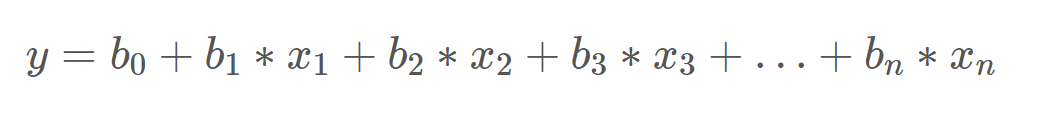

In which b0 was the regression intercept, b1 the coefficient and x1 the data.

That equation resulted in a straight line that was used to predict new values. Recalling the introduction, the difference now is that we won't predict new values, but a class. So that straight line needs to change. With logistic regression, we introduce a non-linearity and the prediction is now made using a curve instead of a line:

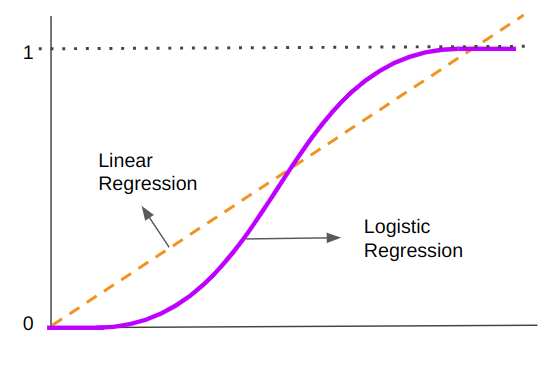

Observe that while the linear regression line keeps going and is made of continuous infinite values, the logistic regression curve can be divided in the middle and has extremes in 0 and 1 values. That "S" shape is the reason it classifies data - the points that are closer or fall on the highest extremity belong to class 1, while the points that are in the lower quadrant or closer to 0, belong to class 0. The middle of the "S" is the middle between 0 and 1, 0.5 - it is the threshold for the logistic regression points.

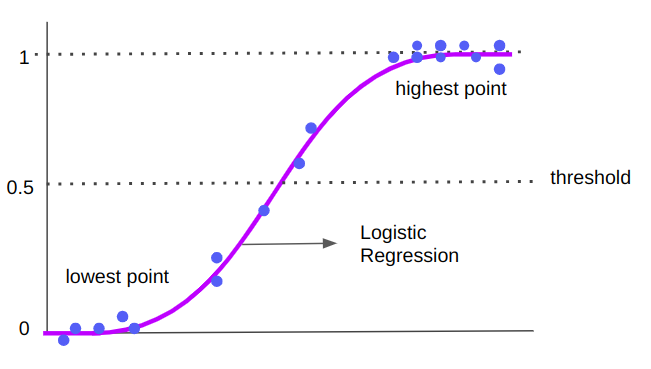

We already understand the visual difference between logistic and linear regression, but what about the formula? The formula for logistic regression is the following:

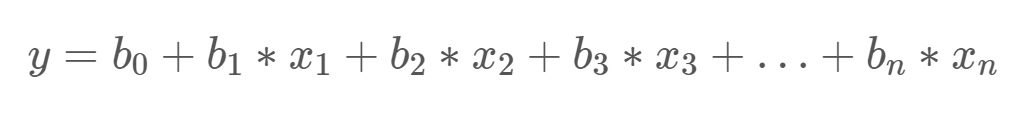

It can also be written as:

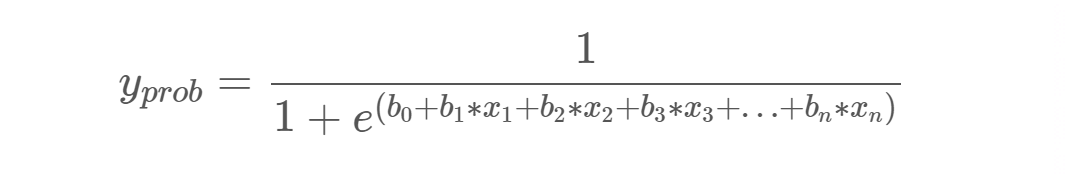

Or even be written as:

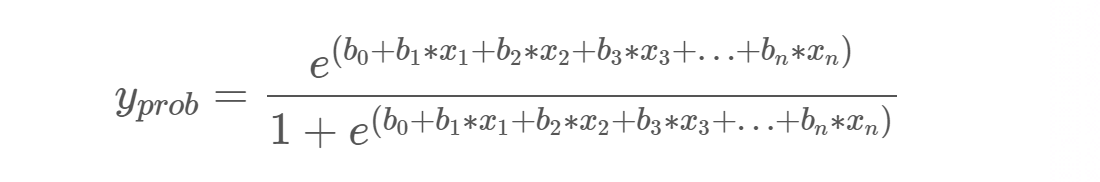

In the equation above, we have the probability of input, instead of its value. It has 1 as its numerator so it can result in a value between 0 and 1, and 1 plus a value in its denominator, so that its value is 1 and something - this means that the whole fraction result can't be bigger than 1.

And what is the value that is in the denominator? It is e, the base of the natural logarithm (approximately 2.718282), raised to the power of linear regression:

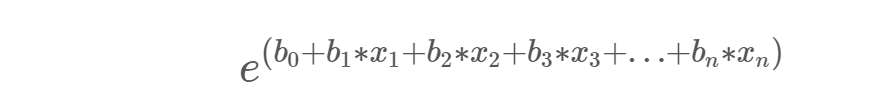

Another way of writing it would be:

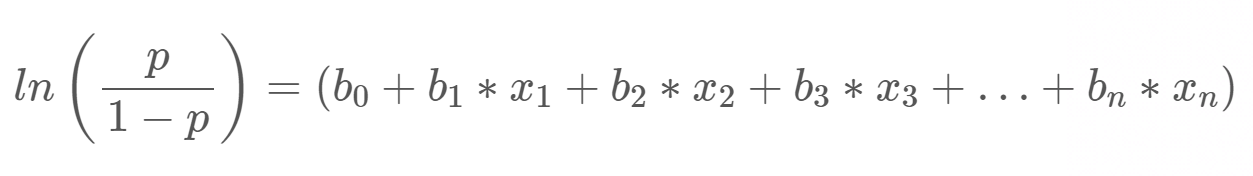

In that last equation, ln is the natural logarithm (base e) and p is the probability, so the logarithm of the probability of the result is the same as the linear regression result.

>**In other words, with the linear regression result and the natural logarithm, we can arrive at the probability of an input pertaining or not to a designed class.**

The whole logistic regression derivation process is the following:

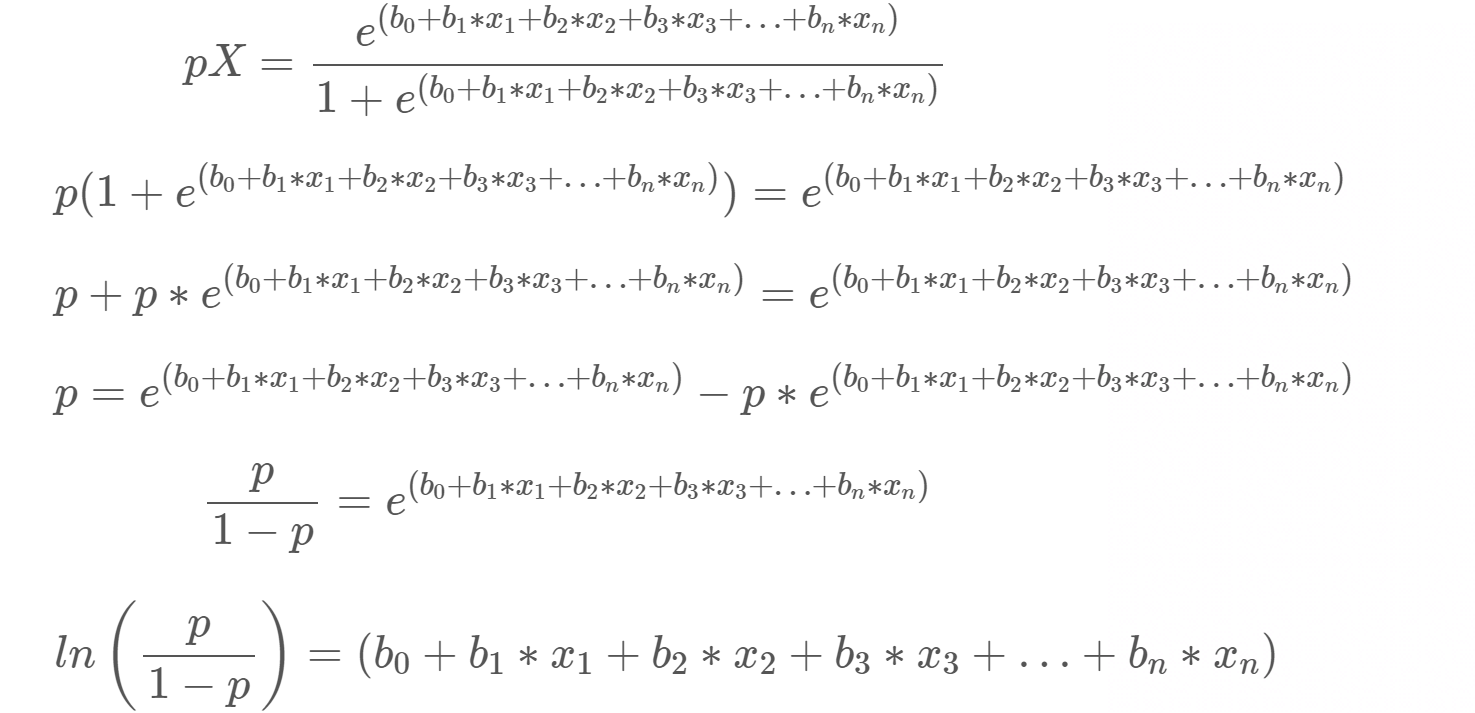

This means that the logistic regression model also has coefficients and an intercept value. Because it uses a linear regression and adds a non-linear component to it with the natural logarithm (e).

It is also important to take a look at the statistical approach to logistic regression. It has assumptions about the behavior of data, and about other statistics which must hold to guarantee satisfactory results, such as:

- the observations are independent;
- there is no multicollinearity among explanatory variables;
- there are no extreme outliers;
- there is a linear relationship between explanatory variables and the logit of the response variable;
- the sample size is sufficiently large.

## Business Problem

The company you work for did a partnership with a Turkish agricultural farm. This partnership involves selling pumpkin seeds. Pumpkin seeds are very important for human nutrition. They contain a good proportion of carbohydrates, fat, protein, calcium, potassium, phosphorus, magnesium, iron, and zinc.

In the data science team, your task is to tell the difference between the types of pumpkin seeds just by using data - or classifying the data according to seed type.

The Turkish farm works with two pumpkin seed types, one is called Çerçevelik and the other Ürgüp Sivrisi.

To classify the pumpkin seeds, your team has followed the 2021 paper "The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution" from Koklu, Sarigil, and Ozbek - in this paper, there is a methodology for photographing and extracting the seeds measurements from the images.

After completing the process described in the paper, the following measurements were extracted:

- Area - the number of pixels within the borders of a pumpkin seed
- Perimeter - the circumference in pixels of a pumpkin seed
- Major Axis Length - also the circumference in pixels of a pumpkin seed
- Minor Axis Length - the small axis distance of a pumpkin seed
- Eccentricity - the eccentricity of a pumpkin seed
- Convex Area - the number of pixels of the smallest convex shell at the region formed by the pumpkin seed
- Extent - the ratio of a pumpkin seed area to the bounding box pixels
- Equivalent Diameter - the square root of the multiplication of the area of the pumpkin seed by four divided by pi
- Compactness - the proportion of the area of the pumpkin seed relative to the area of the circle with the same circumference
- Solidity - the convex and convex condition of the pumpkin seeds
- Roundness - the ovality of pumpkin seeds without considering its edges distortions
- Aspect Ratio - the aspect ratio of the pumpkin seeds

Those are the measurements you have to work with. Besides the measurements, there is also the Class label for the two types of pumpkin seeds.

To start classifying the seeds, let's import the data and begin to look at it.

# Understanding the Dataset

In [4]:
import pandas as pd

df = pd.read_excel("pumpkin_seeds_dataset.xlsx")
df[:5]

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


# Data exploration

In [5]:
 df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [6]:
df.shape

(2500, 13)

In [7]:
df['Class'].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

We can see that there are 1300 samples of the Çerçevelik seed and 1200 samples of the Ürgüp Sivrisi seed. Notice that the difference between them is 100 samples, a very small difference, which is good for us and indicates there is no need to rebalance the number of samples.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,2500.0,80658.220800,13664.510228,47939.0000,70765.000000,79076.00000,89757.500000,136574.0000
Perimeter,2500.0,1130.279015,109.256418,868.4850,1048.829750,1123.67200,1203.340500,1559.4500
Major_Axis_Length,2500.0,456.601840,56.235704,320.8446,414.957850,449.49660,492.737650,661.9113
Minor_Axis_Length,2500.0,225.794921,23.297245,152.1718,211.245925,224.70310,240.672875,305.8180
Convex_Area,2500.0,81508.084400,13764.092788,48366.0000,71512.000000,79872.00000,90797.750000,138384.0000
Equiv_Diameter,2500.0,319.334230,26.891920,247.0584,300.167975,317.30535,338.057375,417.0029
Eccentricity,2500.0,0.860879,0.045167,0.4921,0.831700,0.86370,0.897025,0.9481
Solidity,2500.0,0.989492,0.003494,0.9186,0.988300,0.99030,0.991500,0.9944
Extent,2500.0,0.693205,0.060914,0.4680,0.658900,0.71305,0.740225,0.8296
Roundness,2500.0,0.791533,0.055924,0.5546,0.751900,0.79775,0.834325,0.9396


By looking at the table, when comparing the mean and standard deviation (std) columns, it can be seen that most features have a mean that is far from the standard deviation. That indicates that the data values aren't concentrated around the mean value, but more scattered around it - in other words, they have high variability.

Also, when looking at the minimum (min) and maximum (max) columns, some features, such as Area, and Convex_Area, have big differences between minimum and maximum values. This means that those columns have very small data and also very large data values, or higher amplitude between data values.

With high variability, high amplitude, and features with different measurement units, most of our data would benefit from having the same scale for all features or being scaled. Data scaling will center data around the mean and reduce its variance.

This scenario probably also indicates that there are outliers and extreme values in data. So, it is best to have some outlier treatment besides scaling the data.

>**There are some machine learning algorithms, for instance, tree-based algorithms such as Random Forest Classification, that aren't affected by high data variance, outliers, and extreme values. Logistic regression is different, it is based on a function that categorizes our values, and the parameters of that function can be affected by values that are out of the general data trend and have high variance.**

# Visualizing the Data

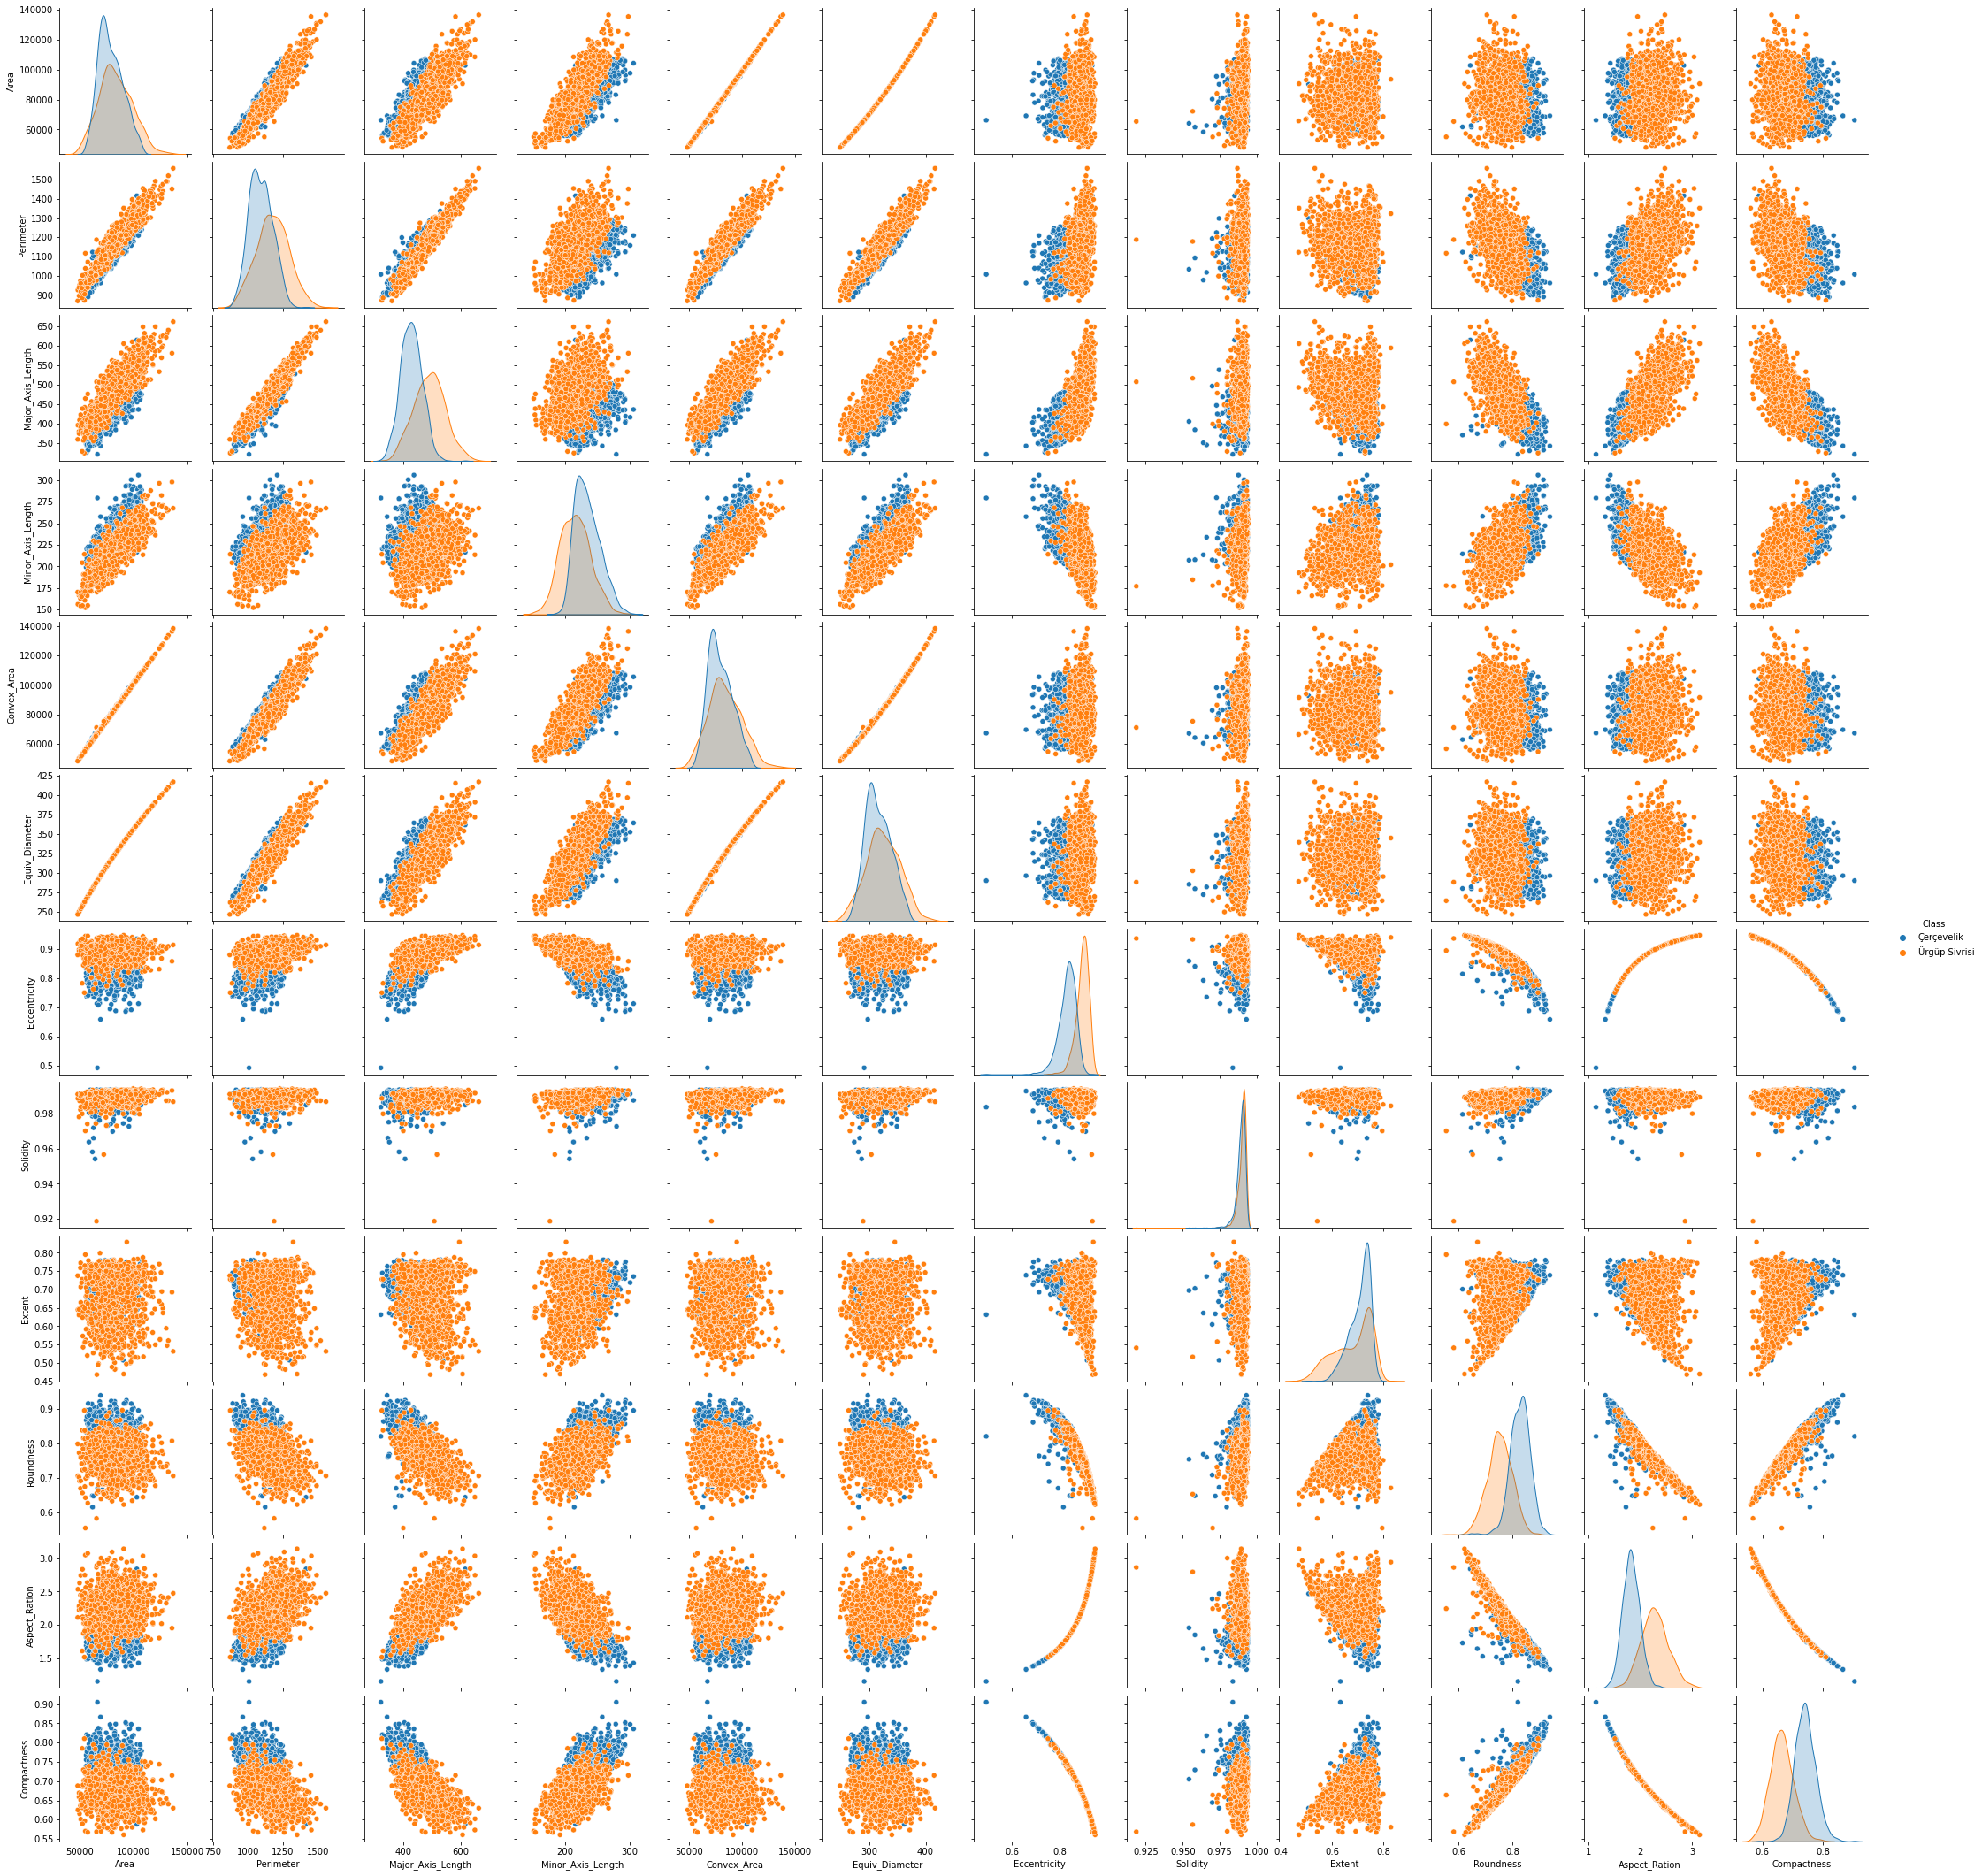

In [6]:
import seaborn as sns

# hue='Class' color codes the points according to both classes in the data
sns.pairplot(data=df, hue='Class')

Looking at the pairplot, we can see that in most cases the points of the Çerçevelik class are clearly separated from the points of the Ürgüp Sivrisi class. Either the points of one class are to the right when the others are to the left, or some are up while the others are down. If we were to use some kind of curve or line to separate classes, this shows it is easier to separate them, if they were mixed, classification would be a harder task.

In the Eccentricity, Compactness and Aspect_Ration columns, some points that are "isolated" or deviating from the general data trend - outliers - are easily spotted as well.

<AxesSubplot:>

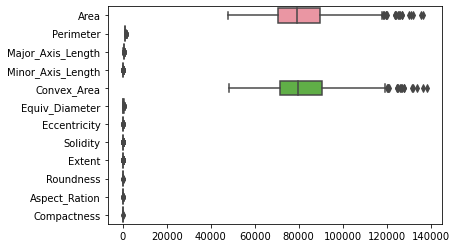

In [7]:
# h is from horizontal
sns.boxplot(data=df, orient='h') 

<AxesSubplot:>

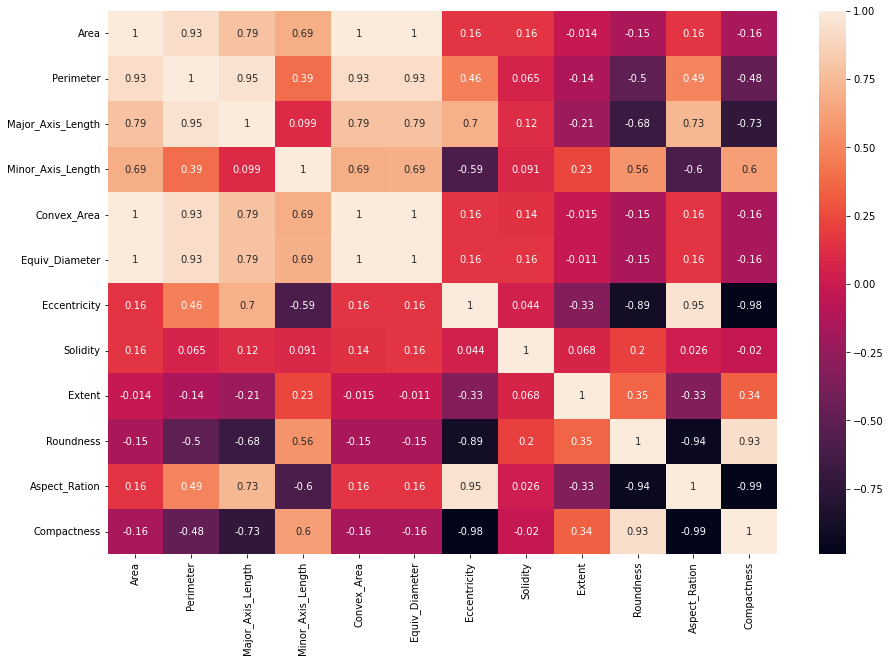

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

correlations = df.corr()
sns.heatmap(correlations, annot=True) # annot=True displays correlation values 

# Pre-processing the Data

In [9]:
X = df.drop(columns="Class")
y = df['Class']

print(X)
print("")
print(y)

       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0       

# Turning Categorical Features into Numeric Features

In [10]:
y = y.replace('Çerçevelik',0).replace('Ürgüp Sivrisi',1)
y

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int64

# Dividing Data into Train and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

seed = 42 # Defining a seed to maintain the same results 
X_train,X_test,y_train,y_test = \
train_test_split(X,y, test_size=0.3, random_state=seed)

X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]

(1750, 750, 1750, 750)

# Scaling Data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<AxesSubplot:>

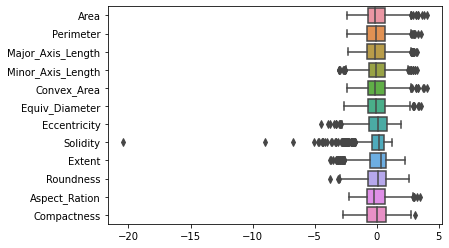

In [13]:
column_names = df.columns[:12] # selecting all columns apart from Class from the original data
X_train = pd.DataFrame(X_train, columns=column_names)

sns.boxplot(data=X_train, orient='h')

# Removing Outliers with IQR Method

We already know that logistic regression can be impacted by outliers. One of the ways of treating them is to use a method called Interquartile Range or IQR. The initial step of the IQR method is to divide our train data into four parts, called quartiles. The first quartile, Q1, amounts to 25% of data, the second, Q2, to 50%, the third, Q3, to 75%, and the last one, Q4, to 100%. The boxes in the boxplot are defined by the IQR method and are a visual representation of it.

Considering a horizontal boxplot, the vertical line on the left marks 25% of the data, the vertical line in the middle, 50% of the data (or the median), and the last vertical line on the right, 75% of the data. The more even in size both squares defined by the vertical lines are - or the more the median vertical line is in the middle - means that our data is closer to the normal distribution or less skewed, which is helpful for our analysis.

Besides the IQR box, there are also horizontal lines on both sides of it. Those lines mark the minimum and maximum distribution values defined by

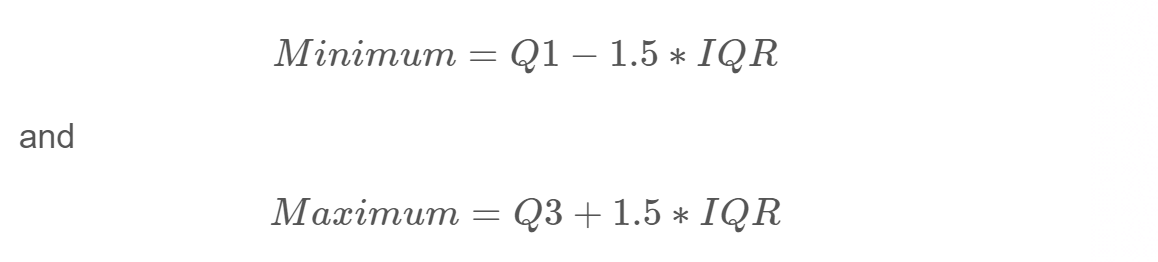

IQR is exactly the difference between Q3 and Q1 (or Q3 - Q1) and it is the most central point of data. That is why when finding the IQR, we end up filtering the outliers in the data extremities, or in the minimum and maximum points. Box plots give us a sneak peek of what the result of the IQR method will be.

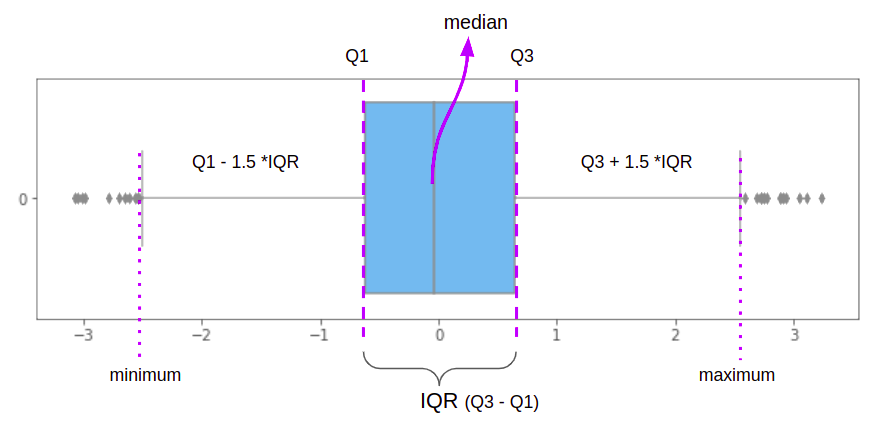

Now we have Q1, Q3, and IQR, we can filter out the values closer to the median:

In [14]:
# Calculationg minimum and maximum values
from scipy.stats import iqr
import numpy as np

q1 = X_train.quantile(q=0.25)
q3 = X_train.quantile(q=0.75)

IQR = X_train.apply(iqr)

minimum = X_train <(q1-1.5*IQR)
maximum = X_train >(q3+1.5*IQR)

# The tilde (~) is a reverse operator, and it will select any row that is 
# not below the minimum or above the maximum area, this is our IQR filter

filter = ~(minimum | maximum).any(axis=1) 

# We can now select the IQR rows in X_train
X_train = X_train[filter]

After filtering our training rows, we can see how many of them are still in the data with shape:

In [15]:
X_train.shape

(1603, 12)

In [16]:
y_train.shape

(1750,)

Notice that y_train still has 1875 rows. We need to match the number of y_train rows to the number of X_train rows and not just arbitrarily. We need to remove the y-values of the instances of pumpkin seeds that we removed, which are likely scattered through the y_train set. The filtered X_train stil has its original indices and the index has gaps where we removed outliers! We can then use the index of the X_train DataFrame to search for the corresponding values in y_train:

In [17]:
y_train = y_train.iloc[X_train.index]

In [18]:
y_train.shape

(1603,)

# Implementing the Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg

LogisticRegression()

In [20]:
# When fitting a DataFrame, rather than a bare NumPy array
# to avoid exceptions, we'll feed only the values without column names

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred[:3]

C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0], dtype=int64)

In [21]:
y_pred_proba = logreg.predict_proba(X_test)

C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
y_pred_proba[:3] 

array([[0.51912532, 0.48087468],
       [0.55358377, 0.44641623],
       [0.8677163 , 0.1322837 ]])

# Evaluating the Model with Classification Reports

The classification report contains the most used classification metrics, such as precision, recall, f1-score, and accuracy.

Precision: to understand what correct prediction values were considered correct by our classifier. Precision will divide those true positives values by anything that was predicted as a positive:

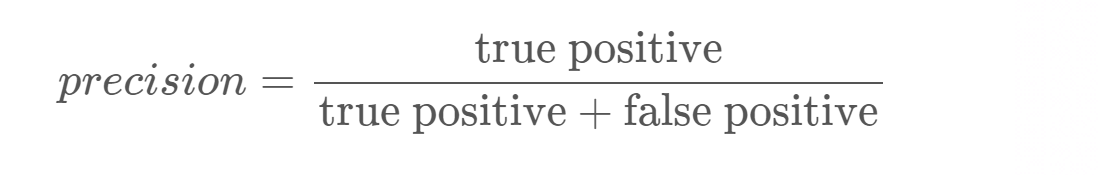

Recall: to understand how many of the true positives were identified by our classifier. The recall is calculated by dividing the true positives by anything that should have been predicted as positive:

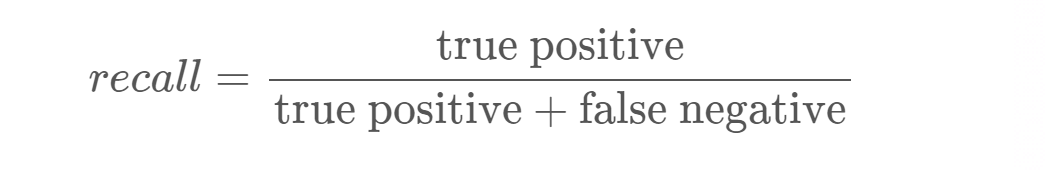

F1 score: is the balanced or harmonic mean of precision and recall. The lowest value is 0 and the highest is 1. When f1-score is equal to 1, it means all classes were correctly predicted - this is a very hard score to obtain with real data:

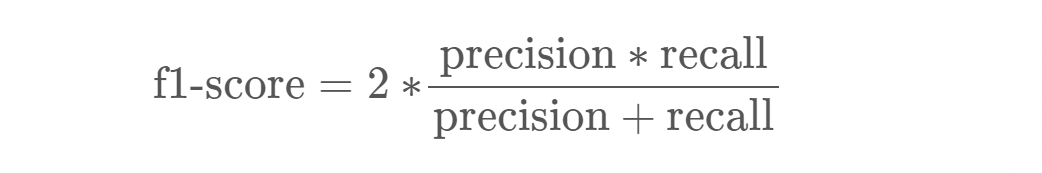

Accuracy: describes how many predictions our classifier got right. The lowest accuracy value is 0 and the highest is 1. That value is usually multiplied by 100 to obtain a percentage:

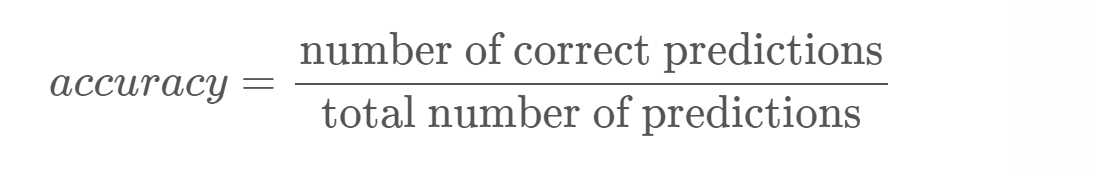

> **Note: It is extremely hard to obtain 100% accuracy on any real data, if that happens, be aware that some leakage or something wrong might be happening - there is no consensus on an ideal accuracy value and it is also context-dependent. A value of 70%, which means the classifier will make mistakes on 30% of the data, or above 70% tends to be sufficient for most models.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, \
precision_score, recall_score, accuracy_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.87       390
           1       0.89      0.82      0.85       360

    accuracy                           0.87       750
   macro avg       0.87      0.86      0.86       750
weighted avg       0.87      0.87      0.86       750



The model's accuracy is 86%, meaning that it gets the classification wrong 14% of the time. We have that overall information, but it would be interesting to know if the 14% mistakes happen regarding the classification of class 0 or class 1. To identify which classes are misidentified as which, and in which frequency - we can compute and plot a confusion matrix of our model's predictions.

# Evaluating the Model with a Confusion Matrix

<AxesSubplot:>

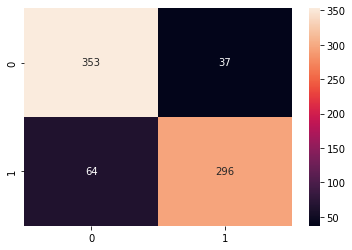

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [52]:
# Calculating Accuracy Score using confusion matrix
acc_score = (353+296)/(353+296+37+64)*100
acc_score

86.53333333333333

In [55]:
# Calculating Accuracy Score using sklearn function

print(accuracy_score(y_test,y_pred))

0.8653333333333333


In [39]:
# Calculating Precision Score using confusion matrix

precision_score = 296/(296+37)*100
precision_score

88.88888888888889

In [56]:
# Calculating Precision Score using sklearn function

print(precision_score(y_test,y_pred))

0.8888888888888888


In [57]:
re_score = 296/(296+64)*100
re_score

82.22222222222221

In [58]:
print(recall_score(y_test,y_pred))

0.8222222222222222


In [ ]:
precision_score

<AxesSubplot:>

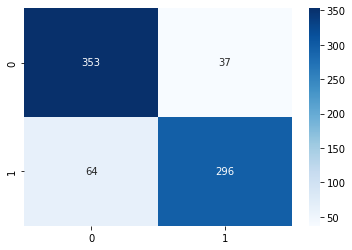

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

<AxesSubplot:>

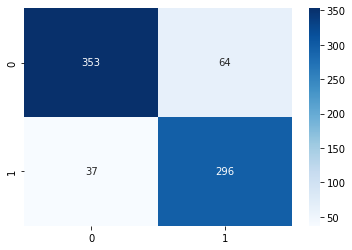

In [62]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

In [67]:
from sklearn.metrics import confusion_matrix
import numpy as np

labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
print(labels)

[['True Neg' 'False Pos']
 ['False Neg' 'True Pos']]


<AxesSubplot:>

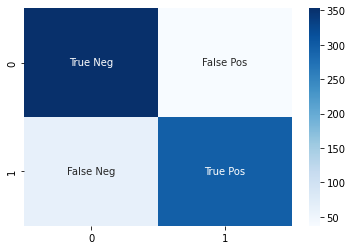

In [68]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = labels, fmt ="", cmap="Blues")

<AxesSubplot:>

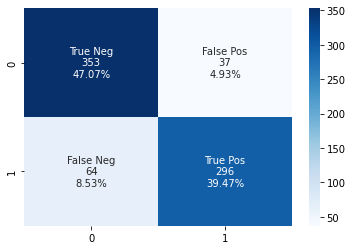

In [71]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')